In [1]:
# Building a Simple Count-based Bigram Model for Generation 

In [12]:
# Data Analysis

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [11]:
sorted(b.items(), key = lambda kv : -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [13]:
# Building Bigram Model

In [15]:
import torch

In [16]:
N = torch.zeros((27, 27), dtype = torch.int32)

In [17]:
chars = sorted(list(set(''.join(words))))
len(chars)

26

In [23]:
# String to Integer (Encoder)
stoi = {ch : idx+1 for idx, ch in enumerate(chars)}
stoi['.'] = 0
stoi

# Integer to String (Decoder)
itos = {idx : ch for ch, idx in stoi.items()}

In [25]:
# Building the count matrix

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        N[idx1, idx2] += 1 

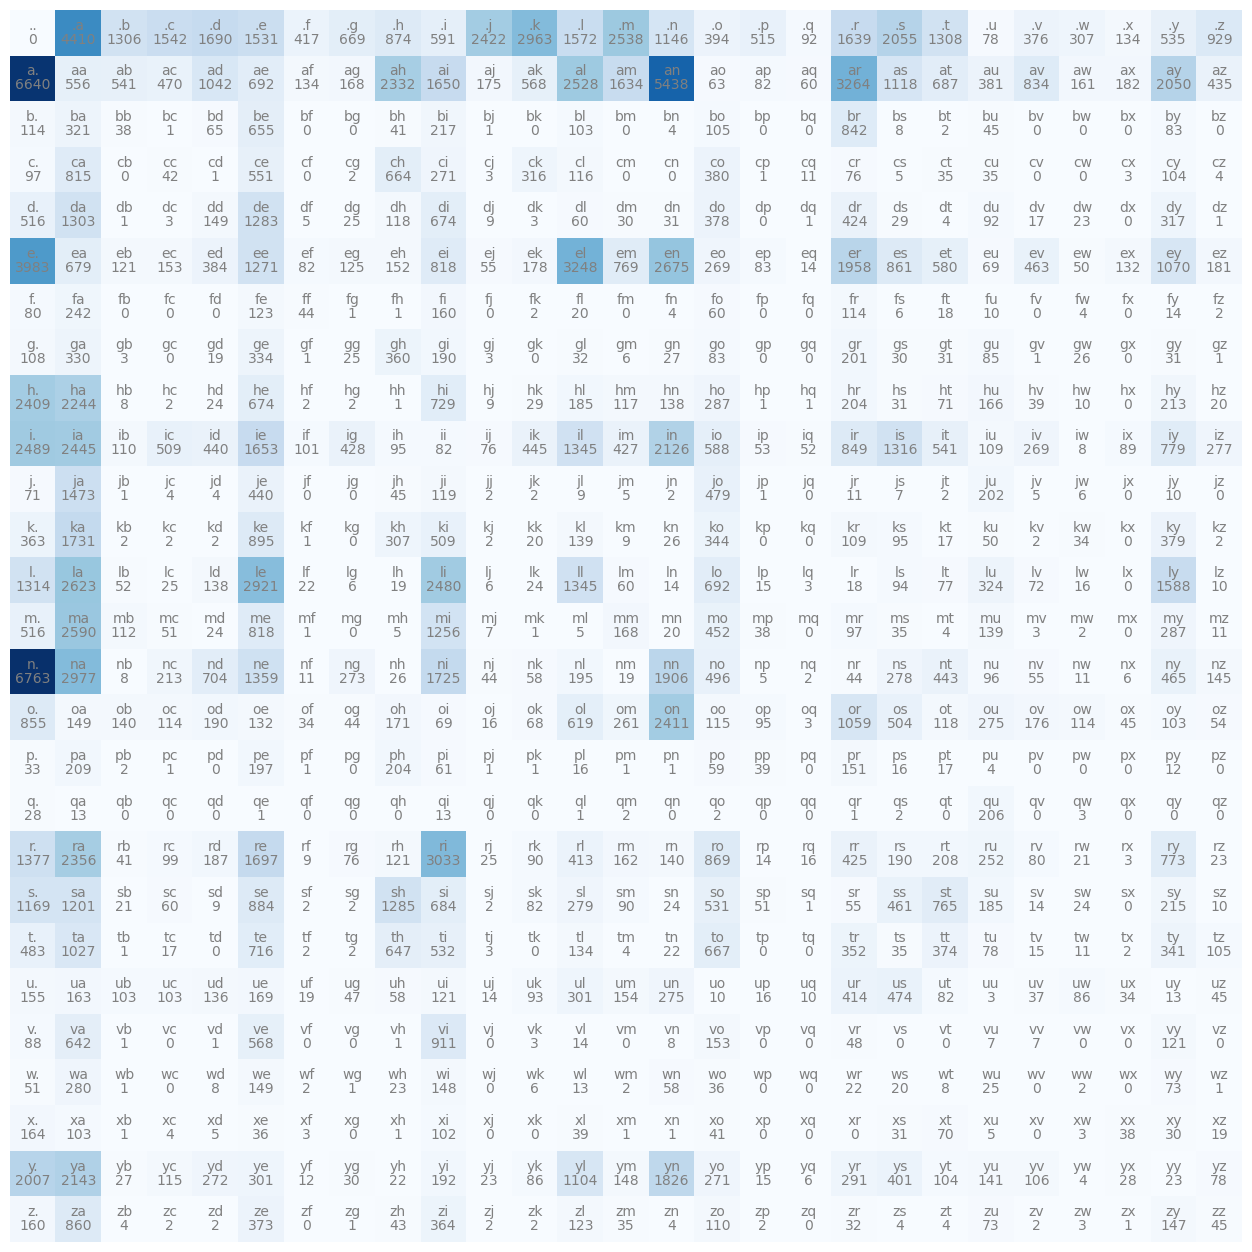

In [32]:
# Visualizing the count matrix

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va='bottom', color = 'gray')
        plt.text(j, i, N[i, j].item(), ha="center", va='top', color = 'gray')

plt.axis('off');

In [34]:
# Normalizing the matrix to get probablisitic counts and use it as a generator

In [35]:
# Normalizing
P = (N + 1).float() # To smooth out zero counts
P /= P.sum(1, keepdim = True)

In [37]:
# Generating

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    
    out = []
    ix = 0    # Start token
    
    while True:
        p = P[ix]
        idx_next = torch.multinomial(p, num_samples=1, replacement=True, generator = g).item()
        out.append(itos[idx_next])
        ix = idx_next
    
        if(idx_next == 0):
            break
    
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [38]:
# Before we repeat the excercise with a single layer perceptron, let's define a check metric and interpret the loss

In [40]:
# The check metric would be negative log likelihood (lower the better)

log_likelihood = 0.0
bigram_count = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        
        prob    = P[idx1, idx2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        bigram_count += 1
        
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/bigram_count}')      

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [41]:
# The negative LL could thus be used as a loss function if we were to use a gradient based technique such as SLP 

In [42]:
# Building a SLP for Generation 

In [45]:
# Creating a Training Set

xs = []
ys = []

# Let's keep it to one word for the time being
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        
        xs.append(idx1)
        ys.append(idx2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [46]:
xs

tensor([ 0,  5, 13, 13,  1])

In [47]:
ys

tensor([ 5, 13, 13,  1,  0])

In [48]:
# We'll pass in the inputs as a one-hot encoding to the SLP

In [50]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes = 27).float()
xenc.shape

torch.Size([5, 27])

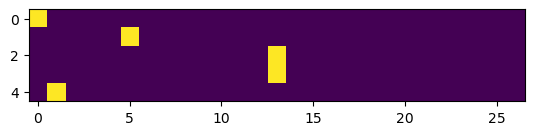

In [51]:
plt.imshow(xenc)

In [59]:
# Let's look at the computation with a single perceptron (no bias)

W = torch.randn((27, 1))

logits = xenc @ W        # log-counts
counts = logits.exp()    # ~N (sort of)
counts.shape
# Remember, the above two together is actually softmax, only now, you know the interpretation of it :D

torch.Size([5, 1])

In [60]:
counts

tensor([[0.1601],
        [1.6380],
        [0.9376],
        [0.9376],
        [1.8101]])

In [70]:
# Let's look at the computation of a single forward pass with a 27 perceptron SLP (no bias)

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
xenc = F.one_hot(xs, num_classes = 27).float()

logits = xenc @ W        # log-counts
counts = logits.exp()    # ~N (sort of)
# Remember, the above two together is actually softmax, only now, you know the interpretation of it :D

probs  = counts / counts.sum(1, keepdim=True)
probs.shape

torch.Size([5, 27])

In [71]:
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [73]:
# NLL tracking to check how good was the forward pass

nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    
    print("-------------------------")
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x} {y})')
    print("input to the NN : ", x)
    print("output probablities from the NN : ", probs[i])
    print('label (actual next character): ', y)
    p = probs[i, y]
    print("Probability assigned by the NN to the correct character : ", p.item())
    logp = torch.log(p)
    print("Log Likelihood : ", logp.item())
    nll = -logp
    print("Negative Log Likelihood : ", nll.item())
    nlls[i] = nll
    
print("======================")
print("Average negative log likelihood : ", nlls.mean().item())

-------------------------
bigram example 1: .e (indexes 0 5)
input to the NN :  0
output probablities from the NN :  tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
label (actual next character):  5
Probability assigned by the NN to the correct character :  0.01228625513613224
Log Likelihood :  -4.399273872375488
Negative Log Likelihood :  4.399273872375488
-------------------------
bigram example 2: em (indexes 5 13)
input to the NN :  5
output probablities from the NN :  tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
       grad_fn=<SelectBackward0>)
label (actual next c

In [110]:
# Let's train the SLP now
# (Also, summarize)

In [111]:
# Creating a Training Set

xs = []
ys = []
bigram_count = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        xs.append(idx1)
        ys.append(idx2)
        bigram_count += 1
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print("Number of examples : ", bigram_count)

Number of examples :  228146


In [112]:
# Initialize the SLP
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [116]:
# Training the SLP

for k in range(100):
    xenc = F.one_hot(xs, num_classes = 27).float()
    logits = xenc @ W        
    counts = logits.exp()    
    probs  = counts / counts.sum(1, keepdim=True)
    
    # The mean NLL accounting for the prob of next character + Regularization term for incentivizing W's to be near 0 (similar to the smoothening we did earlier) 
    loss   = -probs[torch.arange(bigram_count), ys].log().mean() + 0.01 * (W**2).mean()
    print(loss.item())
    
    # Zero out gradients
    W.grad = None
    
    # Backward pass
    loss.backward()
    
    # Step
    W.data += -50 * W.grad

2.481499433517456
2.4814915657043457
2.4814834594726562
2.481475591659546
2.4814682006835938
2.4814603328704834
2.481452703475952
2.4814453125
2.4814376831054688
2.4814302921295166
2.4814231395721436
2.4814157485961914
2.4814083576202393
2.4814016819000244
2.4813942909240723
2.4813878536224365
2.4813807010650635
2.4813737869262695
2.481367349624634
2.4813601970672607
2.481353759765625
2.4813473224639893
2.4813406467437744
2.4813342094421387
2.481327772140503
2.481321334838867
2.4813148975372314
2.481308937072754
2.4813027381896973
2.4812963008880615
2.481290578842163
2.4812846183776855
2.481278896331787
2.4812726974487305
2.481266975402832
2.4812612533569336
2.481255531311035
2.4812498092651367
2.4812445640563965
2.481238603591919
2.4812331199645996
2.4812276363372803
2.481222152709961
2.4812166690826416
2.4812114238739014
2.481206178665161
2.481200695037842
2.4811956882476807
2.4811906814575195
2.4811854362487793
2.481180191040039
2.481175661087036
2.481170415878296
2.481165647506714


In [118]:
# Using the NN as a genrator now

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0    # Start token
    
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
        logits = xenc @ W        
        counts = logits.exp()    
        probs  = counts / counts.sum(1, keepdim=True)
        
        idx_next = torch.multinomial(probs, num_samples=1, replacement=True, generator = g).item()
        out.append(itos[idx_next])
        ix = idx_next
    
        if(idx_next == 0):
            break
    
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.


In [119]:
# Interesting note : 
# The 27 perceptron SLP sort of replicated the Bigram model computed using pure statistical counts
# (of course, purely due to our loss function)